# Interpretando los modelos, conectando con humanos

## SHAP Values

Veremos brevemente un modelo de interpretabilidad para modelos complejos de machine learning como es un LGBM.

Una buena referencia para adentrarse en este mundo: [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/)
Empezamos con la instalación y carga de los módulos necesarios:

In [1]:
%pip install shap


In [2]:
import pandas as pd
import numpy as np

import lightgbm as lgb
import shap


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Cargamos el dataset. Vamos a trabajar con el primer conjunto de datos.


In [3]:
base_path = '/content/drive/MyDrive/DMEyF/2024/'
dataset_path = base_path + 'datos/'
modelos_path = base_path + 'modelos/'
dataset_file = 'competencia_01.csv'

data = pd.read_csv(dataset_path + dataset_file)

In [4]:
Xtrain = data[data['foto_mes'] == 202104]
ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)

In [5]:
Xtrain = Xtrain.drop("clase_ternaria", axis=1)

Hacemos un modelo **LGBM**

In [6]:
lgb_train = lgb.Dataset(Xtrain, ytrain)

params = {
    'objective': 'binary',
    'learning_rate': 0.01,
    'verbose': 2,
    'max_bin': 15,
    'min_data_in_leaf': 500,
    'verbose': 0,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100)


In [7]:
lgbm_importancia = pd.DataFrame({'Features': gbm.feature_name(),
                        'Importances': gbm.feature_importance()})
lgbm_importancia.sort_values(by='Importances', inplace=True, ascending=False)
lgbm_importancia


,Features,Importances
51,cpayroll_trx,195
8,mrentabilidad_annual,185
33,mprestamos_personales,181
22,mcuentas_saldo,165
107,ctrx_quarter,159
...,...,...
69,ctarjeta_master_descuentos,0
68,mtarjeta_visa_descuentos,0
67,ctarjeta_visa_descuentos,0
66,mcajeros_propios_descuentos,0


Ahora avanzamos aplicando un modelo de interpretabilidad sobre el modelo anterior.

In [8]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(Xtrain)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


Consolidamos los valores de **SHAP** para cada variable y para cada **BAJA+\***

In [11]:
shap_df = pd.DataFrame(shap_values, columns = Xtrain.columns)
shap_df

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,0.000108,0.0,-0.000064,0.0,0.000780,-0.000327,-0.000036,-0.006931,0.111702,-0.000217,...,0.0,0.000030,-0.000422,-0.004568,0.0,-0.002001,0.0,-0.000036,0.0,0.000400
1,0.000782,0.0,-0.000035,0.0,0.000828,-0.001488,0.000260,0.009638,-0.060537,-0.000213,...,0.0,0.000030,-0.000323,0.002208,0.0,-0.009880,0.0,-0.000246,0.0,0.002237
2,-0.000954,0.0,-0.000166,0.0,0.003445,-0.004733,0.000036,-0.019872,0.030292,-0.002095,...,0.0,-0.000116,-0.000138,-0.000053,0.0,-0.002781,0.0,0.001000,0.0,0.021907
3,0.000786,0.0,-0.000116,0.0,0.004378,-0.016219,0.000292,0.021660,0.053400,0.029521,...,0.0,0.000194,-0.000279,0.001874,0.0,0.003535,0.0,-0.003775,0.0,-0.032580
4,0.002799,0.0,-0.000027,0.0,0.001109,-0.003192,-0.001338,0.008862,-0.075301,0.000561,...,0.0,-0.000048,-0.000098,-0.000334,0.0,0.014763,0.0,0.012885,0.0,0.028679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164085,-0.000697,0.0,-0.000064,0.0,0.000781,-0.001061,0.000327,-0.006617,0.029540,-0.000164,...,0.0,-0.000029,0.000156,-0.000192,0.0,0.007741,0.0,-0.000065,0.0,-0.001508
164086,-0.000613,0.0,-0.000044,0.0,0.000793,0.004531,0.001169,-0.004326,-0.029545,-0.000161,...,0.0,0.000018,-0.000142,0.000178,0.0,0.004849,0.0,-0.000080,0.0,0.008610
164087,-0.001724,0.0,-0.000035,0.0,0.000882,-0.002153,0.000243,0.085012,0.190670,0.002264,...,0.0,0.000031,-0.001601,-0.000528,0.0,0.026746,0.0,-0.000117,0.0,0.024237
164088,-0.000756,0.0,-0.000035,0.0,0.000775,0.000666,0.000348,0.000745,-0.008159,-0.000151,...,0.0,0.000018,-0.000128,0.000065,0.0,0.012150,0.0,-0.000147,0.0,-0.001400


Calculamos la importancia de las variables usando SHAP


In [14]:
shap_importancia = pd.DataFrame(np.abs(shap_values).mean(0), columns=['SHAP Importance'])
shap_importancia['Feature'] = Xtrain.columns
shap_importancia.sort_values('SHAP Importance', ascending=False, inplace=True)
shap_importancia



,SHAP Importance,Feature
51,0.301123,cpayroll_trx
107,0.238453,ctrx_quarter
11,0.057666,mpasivos_margen
8,0.054274,mrentabilidad_annual
22,0.053195,mcuentas_saldo
...,...,...
87,0.000000,mcheques_depositados
86,0.000000,ccheques_depositados
83,0.000000,mtransferencias_emitidas
82,0.000000,ctransferencias_emitidas


La librería nos da útiles herramientas para vizualizar la info anterior

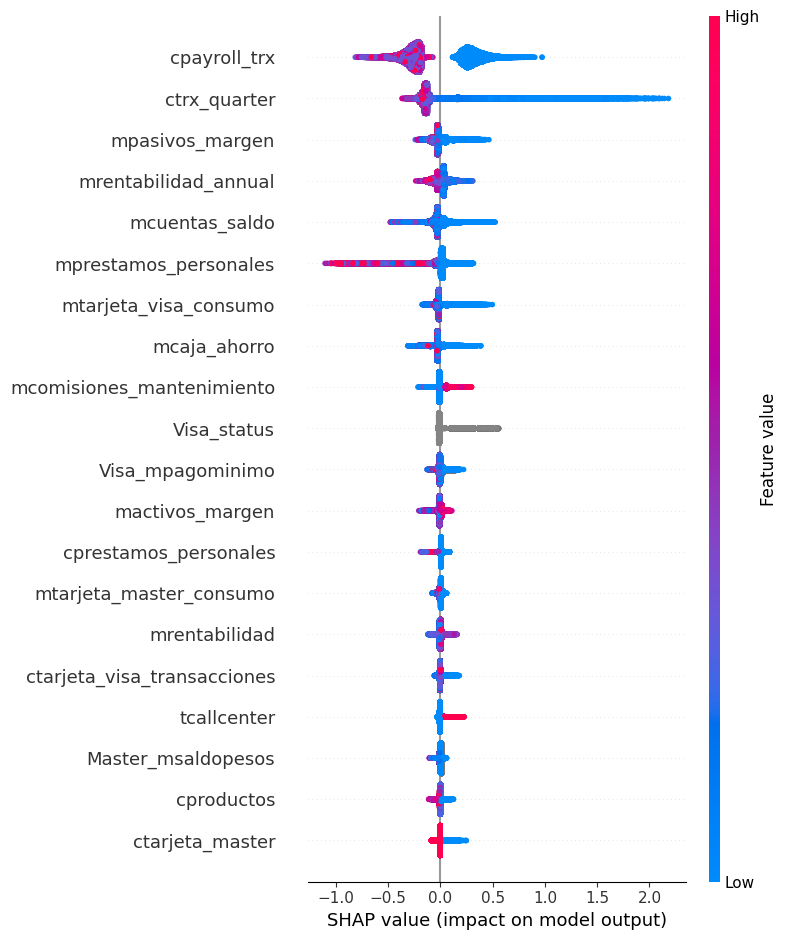

In [13]:
shap.summary_plot(shap_values, Xtrain)


Y ahora debemos empezar a jugar para entender como estan asociadas las variables a los **shap values**

Para ver más opciones de visualización
https://www.youtube.com/watch?v=L8_sVRhBDLU&t=3s